# Interpolación y Regresión
## Introducción




## Lagrange interpolation
El polinomio de lagrange
$$ f_n(x) = \sum^n_{i=0} L_i(x) f(f_i)$$
donde:
$$ L_i(x) = \prod^n_{j=0 \bbox {..} j\neq 1}{\frac{x-x_j}{x_i-x_j}} $$

Ejemplo:
Si queremos utilizar el metodo de lagrange para interpolar los valores de 

$ x_0 = 1 \quad f(x_0) = 0$

$ x_1 = 4 \quad f(x_1) = 1.386294$

$ x_2 = 6 \quad f(x_2) = 1.791760$

El caso para una interpolacion para x = 2, podemos utilizar un polinomio lineal ($n=0$).

In [1]:
def L_i(n,i,x,X):
    resultado = 1;
    for j in range(n+1):
        #print(i,j)
        if(not j == i ):
            resultado = resultado * (x-X[j])/(X[i]-X[j])
    return resultado

def lagrange(n, x, X,F):
    resultado = 0
    for i in range(n+1):
        #print(i)
        resultado += L_i(n,i,x,X) * F[i]
    return resultado


In [2]:
X = [1, 4,6]
F = [0, 1.386294, 1.791760]
lagrange(1,2,X,F)

0.46209799999999995

In [3]:
lagrange(2,2, X,F)

0.5658439999999999

In [4]:
import numpy as np
import matplotlib.pylab as plt

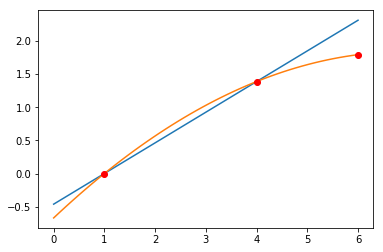

In [5]:
x_array = np.linspace(0,6)
f_1_array = np.array(list(map(lambda x:lagrange(1,x,X,F), x_array)))
f_2_array = np.array(list(map(lambda x:lagrange(2,x,X,F), x_array)))
#f_3_array = np.array(list(map(lambda x:lagrange(3,x,X,F), x_array)))

plt.Figure()
plt.plot(x_array, f_1_array)
plt.plot(x_array, f_2_array)
#plt.plot(x_array, f_3_array)
plt.plot(X,F,"or")

In [6]:
from ipywidgets import interact
@interact(n=(1, 9))
def f(n):
    X = np.linspace(0,4,10)
    F = np.sin(X)
    x_array = np.linspace(0,4)
    f_n_array = np.array(list(map(lambda x:lagrange(n,x,X,F), x_array)))
    plt.plot(x_array, f_n_array)
    plt.plot(X,F,"or")
    plt.ylim(-1.5,1.5)
    plt.show()

interactive(children=(IntSlider(value=5, description='n', max=9, min=1), Output()), _dom_classes=('widget-inte…

## Splines
### Splines cuadraticas
### Splines cubicas

## Interpolacion multidimensional
### Interpolacion bicubica

In [7]:
from ipywidgets import interact
@interact(n=(1, 10))
def f(n):
    X = np.linspace(0,5,10)
    F = np.sin(X)
    x_array = np.linspace(0,6)

    f_n_array = np.array(list(map(lambda x:lagrange(n,x,X,F), x_array)))

    plt.plot(x_array, f_n_array)

    plt.plot(X,F,"or")
    plt.ylim(-2,2)
    plt.show()

interactive(children=(IntSlider(value=5, description='n', max=10, min=1), Output()), _dom_classes=('widget-int…

## Regresión (o Ajuste de Curvas)
El problema de ajustes de curvas es es el proseso inverso de interpolacion, donde en este caso tenemos un conjunto de puntos obtenidos de un (experimento, observacion o analisis) y deseamos construir una funcion analitica o algebraica que se aproxime a estos puntos. Este conjunto de puntos en el caso unidimensional, puede aprooximarse a una funcion de una variable por ejemplo, una linea recta una parabola, una funcion exponencial, logaritmica o incluso un polinomio. A continuación presentaremos un ejemplo  con datos de costos de casas segun su  metros cuadrados en un aregion espesifica del pais.

|Casa # | $mts^2$ | costo $|  
|-------|----|-----|
|Casa 1 | 80 | 100,000.00|
|Casa 2 | 99 | 220,000.00|
|Casa 3 | 120 | 300,000.00|
|Casa 4 | 200 | 500,000.00|
|Casa 5 | 250 | 602,000.00|

In [8]:
a = np.array([[80,99,120,200,250],[100000,220000,300000,500000,602000]]).T
a

array([[    80, 100000],
       [    99, 220000],
       [   120, 300000],
       [   200, 500000],
       [   250, 602000]])

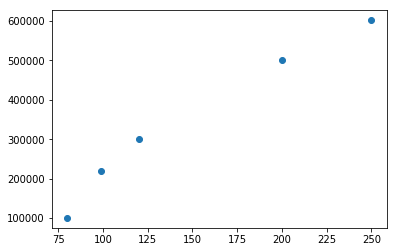

In [9]:
metros =  a[:,0]
costos =  a[:,1]
plt.plot(metros,costos,"o")

El concepto de regresión es ajustar una curva que aproxime los puntos, para definir el problema debemos introducir la funcion de hipotesis en este caso una linea recta, sabemos que la linea recta tiene la funcion:
$$ y = b + m x$$
El cual b es el punto de cruza el eje $y$ cuando $x=0$ y m es la pendiente de la recta.
Una  linea recta  como ejemplo seria 

In [10]:
@interact(b=(-5.0,5.0),m=(-3.0,3.0))
def plot(b,m):
    X = np.linspace(-10,10)
    Y = b + m * X
    plt.plot(X,Y)
    plt.grid()
    plt.ylim(-10,10)
    plt.xlim(0,10)

interactive(children=(FloatSlider(value=0.0, description='b', max=5.0, min=-5.0), FloatSlider(value=0.0, descr…

Si deasemos aproximar una linea recta al los puntos del ejemplo mencionado podemos utilizar dos parametros para manipular o intercatuar, estos "parametro" son valores arbritarios. Para fromalizar el problem de buscar la mejor curva tenemos que definir un criterio a obptimizar en este caso el error, Como los puntos se definen por una tupla o vector de valores y la curva como un continuo de infinitos puntos, necesitamos evaluar el error en cada punto, es decir, que tan lejos estamos del valor exacto.  Analiticamne este valor se define cmo la diferencia entre el valo exacto y el valor aprooximado para cada punto

$$ e_i  = (y_{i} - y'_i)$$
Donde $y'$ seria los valores aproximados
$$ y' = b + m x$$



interactive(children=(FloatSlider(value=5000.5, description='b', max=10000.0, min=1.0), FloatSlider(value=5000…

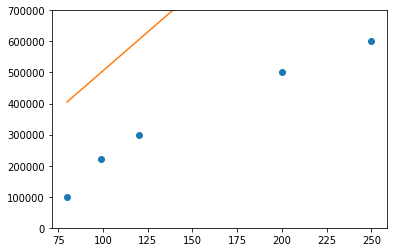

In [11]:
@interact(b=(1.0,1e4),m=(1.0,1e4))
def plot(b,m):
    X = np.linspace(metros[0],metros[-1],metros.size)
    Y = b + m * X
    plt.plot(metros,costos,"o",X,Y)
    plt.ylim(0,7e5)
    
    # calculo de error
    error
    

In [12]:
@interact(b=(1.0,1e4),m=(1.0,1e4))
def plot_error(b,m):
    X = np.linspace(metros[0],metros[-1],metros.size)
    Y = b + m * X
    plt.figure()
    plt.plot(metros,costos,"o",X,Y)
    plt.ylim(0,7e5)
    plt.show()
    
    # calculo de error
    error = Y - costos
    plt.figure()
    plt.plot(metros,error)
    plt.show()

interactive(children=(FloatSlider(value=5000.5, description='b', max=10000.0, min=1.0), FloatSlider(value=5000…

El error claramente depende de los valores escogidos de los parametros de la curva en este caso $b$ y $m$ por lo tanto podemos sumar el cuadrado del error ( por razone de cancelar numeros negativos y psitivos)

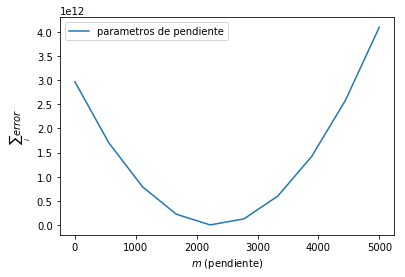

In [13]:
intentos = 10;
pendientes = np.linspace(0,5000,intentos)
errores = np.zeros(intentos)
i = 0
# calculo de error
for pendiente in pendientes.tolist():
    errores[i] = ((metros*pendiente - costos).sum(axis=0)**2)
    i += 1
    
plt.plot(pendientes, errores,label="parametros de pendiente")
plt.legend(loc="best")
plt.xlabel("$m$ (pendiente)")
plt.ylabel("$\sum_i error$")
plt.show()

In [14]:
display("Errores:",errores)
mejor = pendientes[4]
mejor

'Errores:'

array([2.96528400e+12, 1.70534579e+12, 7.91704494e+11, 2.24360111e+11,
       3.31264198e+09, 1.28562086e+11, 6.00108444e+11, 1.41795172e+12,
       2.58209190e+12, 4.09252900e+12])

2222.222222222222

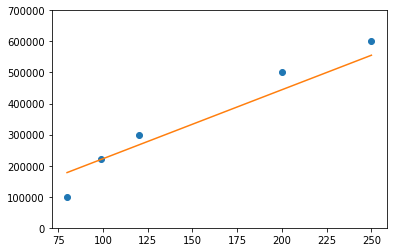

In [15]:
    X = np.linspace(metros[0],metros[-1],metros.size)
    Y = 0 + (mejor) * X
    plt.figure()
    plt.plot(metros,costos,"o",X,Y)
    plt.ylim(0,7e5)
    plt.show()   


### Métodos de minimos cuadrados
Sin duda alguna un metodo que minimize el error cuadrado es la forma mas optima para ajustar una curva en este primer ejemplo el caso de la linea recta. definimos los "parametros" $[a_0,a_1]$ que se fdeniene como y $a_0=b$ y $a_1=m$.

$$ y = a_0 + a_1 x$$

El calculo del error como la diferencia entre el valor requerido y el valor aproximado:


$$ \sum_{i=1}^ne_i = \sum_{i=1}^n (y_i - a_0 - a_1 x_i)$$

Un opcion para evitar la cancelacion de errore por los signos es utilizar el valor absoluto, pero esta seleccion crea una discontinuidad de primer orden, y para propositos de optimizacion utilizando derivadas preferimos utilizar el cuadrado del error que crea por lomenos un error suave, o continuo de clase 1. El error total se puede calcular como $S$

$$S = \sum_{i=0}^n e^2_i = \sum_{i=0}^n (y_{i, medido}-y_{i, modelo})^2 = \sum_{i=1}^n (y_i - a_0 - a_1 x_i)^2 $$ 


El objetivo es buscar los valores de $a_i$ para $i=0,1$ que minimize el valor de $S$.
#### Caso Lineal
En el caso de la linea recta podemos utilizar el concepto de la primera derivada para buscar analiticamente el valor minimo de los valores de los parametros $a_0$ $a_1$.
$$ \frac{\partial S}{\partial a_0} = -2 \sum(y_i -a_0 - a_1 x_i) $$
$$ \frac{\partial S}{\partial a_1} = -2 \sum[(y_i -a_0 - a_1 x_i)x_i ]$$
Podemos simplificar un poco, y aprovachar la propiedad lineal de la sumatoria:
$$0= \sum y_i - \sum a_0 - \sum a_1 x_i $$
$$0= \sum y_i x_i - \sum a_0 x_i - \sum a_1 x_i^2 $$


Si $\sum a_0 = na_0$ podemos escribir las dos ecuaciones como un sistema lineal de dos ecuaciones y dos incognitas:

$$ n a_0 + (\sum x_i) a_1 = \sum y_i$$
$$ ( \sum x_i)a_0 + (\sum x_i^2) a_1 = \sum x_i y_i$$

En notación matricial:
$$ \begin{bmatrix} n & \sum x_i \\ \sum x_i & \sum x_i^2 \end{bmatrix}
\begin{bmatrix} a_0\\ a_1 \end{bmatrix} = 
\begin{bmatrix} \sum y_i\\ \sum x_i y_i \end{bmatrix} 
$$

La solucion directa a este sistema lineal es:
$$ a_1 = \frac{n \sum{x_i y_i} - \sum{x_i}\sum{y_i}}{n \sum x_i^2 - (\sum x_i)^2} $$

$$ a_0 = \bar y - a_1 \bar x $$


Donde $\bar x$ y $\bar y$ son el promedio de $x$ y $y$ respectivamente.


## Practicas
1)  definir las funciones para calculo directo de la regresion lineal a_0 y a_1

2) resolver el problema de forma directa (organizar el trabajo en una tabla)


## Regresion  de polinomios

In [16]:
ss

NameError: name 'ss' is not defined